![image](screenshot.png)

# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 30 minutes**. For this time interval, using the values of the **5 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train an LSTM network.**



Features:

* Datetime: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

PowerConsumption

## Dataset links:
 * [DS1](https://drive.google.com/file/d/1k5Ee9kla-0s8iuEASsSY2u5hl6YstzlN/view?usp=sharing)
 * [DS2](https://drive.google.com/file/d/1--Kep6SOWuyQ2FTlBDdwWHj-65bOl1kc/view?usp=sharing)

## Read the datasets

In [557]:
import pandas as pd
from pyasn1.type.useful import UTCTime

df1 = pd.read_csv("./data/power_consumption_g1.csv")
df2 = pd.read_csv("./data/power_consumption_g1_feat.csv")

In [558]:
df1.sample(5)

,Datetime,PowerConsumption
15659,2017-09-23 05:10:00,27162.47788
49858,2017-06-07 21:30:00,44261.72185
14404,2017-04-29 23:10:00,34795.60818
17375,2017-08-06 12:30:00,38683.41842
10743,2017-12-17 15:00:00,27996.95817


In [559]:
df2.sample()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
1394,2017-09-06 05:10:00,21.46,83.2,0.259,0.058,0.107


## Merge the datasets (and pre-processing if needed)


In [560]:
df1["Datetime"] = pd.to_datetime(df1["Datetime"])
df2["Datetime"] = pd.to_datetime(df2["Datetime"])


In [561]:
df1.set_index(keys=["Datetime"], inplace=True)
df2.set_index(keys=["Datetime"], inplace=True)
df1.sort_index(inplace=True)
df2.sort_index(inplace=True)


In [562]:
df1

,PowerConsumption
Datetime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


In [563]:
df1.isnull().sum()

PowerConsumption    0
dtype: int64

In [564]:
df2.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
dtype: int64

In [565]:
def join_dataframes_by_index(df1, df2, how='inner'):
    return pd.merge(df1, df2, left_index=True, right_index=True, how=how)

In [566]:
# df = concatenate_by_index_horizontally(df2,df1)
df = join_dataframes_by_index(df2,df1)

In [567]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [568]:
df.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
PowerConsumption         0
dtype: int64

In [569]:
df.head(1)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01,6.559,73.8,0.083,0.051,0.119,34055.6962


In [570]:
df.tail(1)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-12-30 23:50:00,6.58,74.1,0.081,0.062,0.111,28349.80989


In [571]:
def fill_missing_values(df:pd.DataFrame, column_name:str)->pd.DataFrame:

    df_copy = df.copy()
    first_valid_idx = df_copy[column_name].first_valid_index()
    last_valid_idx = df_copy[column_name].last_valid_index()

    df_copy[column_name] = df_copy[column_name].interpolate(method='linear')
    df_copy.loc[:first_valid_idx, column_name] = df_copy.loc[:first_valid_idx, column_name].bfill()
    df_copy.loc[last_valid_idx:, column_name] = df_copy.loc[last_valid_idx:, column_name].ffill()

    return df_copy

def qualitative_quantitative_attrs(df):
    qualitative_attributes = [col for col in df.columns if len(df[col].unique())<10]
    quantitative_attributes = [col for col in df.columns if len(df[col].unique())>10]
    return qualitative_attributes,quantitative_attributes

In [572]:
qualitative_attributes,quantitative_attributes = qualitative_quantitative_attrs(df)

In [573]:
qualitative_attributes

[]

In [574]:
quantitative_attributes

['Temperature',
 'Humidity',
 'WindSpeed',
 'GeneralDiffuseFlows',
 'DiffuseFlows',
 'PowerConsumption']

In [575]:
for att in quantitative_attributes:
    df = fill_missing_values(df,att)

In [576]:
df.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64

## Group the datasets into time intervals of 30 mintues

In [577]:
df = df.groupby(pd.Grouper(freq="30min")).mean()

In [578]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743


In [579]:
def cast_selected_columns(df: pd.DataFrame, columns: list, dtype: str) -> pd.DataFrame:
    df = df.copy()
    df[columns] = df[columns].astype(dtype)
    return df

In [580]:
df = cast_selected_columns(df,quantitative_attributes,"float")

In [581]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743


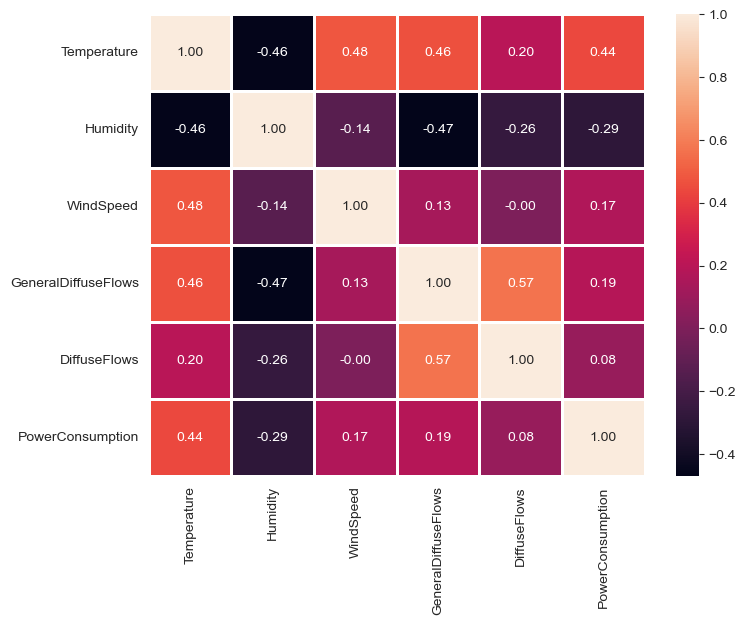

In [582]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[quantitative_attributes].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

In [583]:
df.drop(columns=["GeneralDiffuseFlows"],axis=1,inplace=True)

In [584]:
qualitative_attributes,quantitative_attributes = qualitative_quantitative_attrs(df)


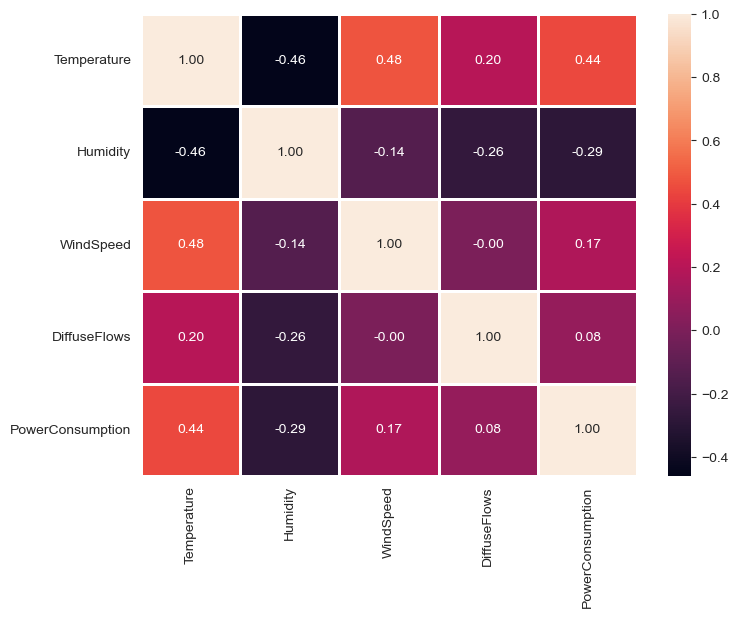

In [585]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[quantitative_attributes].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

In [586]:
def plot_line_for_columns(df:pd.DataFrame, columns:list[str]):
    for col in columns:
        plt.figure(figsize=(5, 3))
        sns.lineplot(df[col])
        plt.show()


In [587]:
quantitative_attributes

['Temperature', 'Humidity', 'WindSpeed', 'DiffuseFlows', 'PowerConsumption']

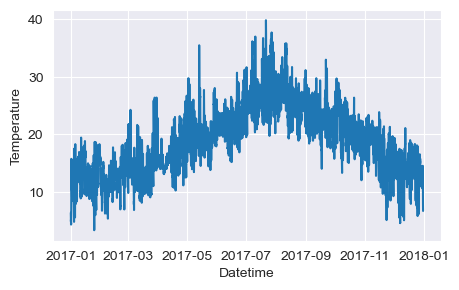

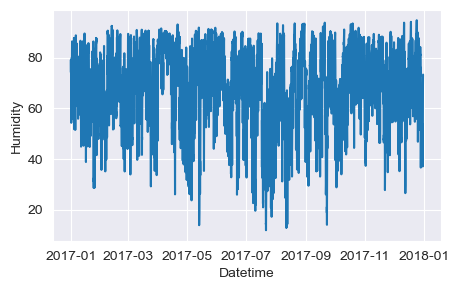

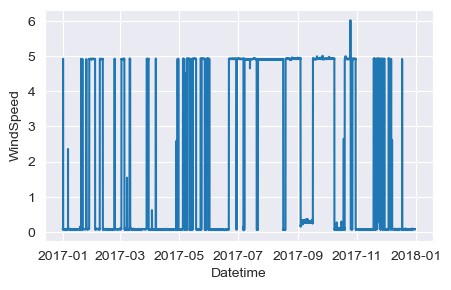

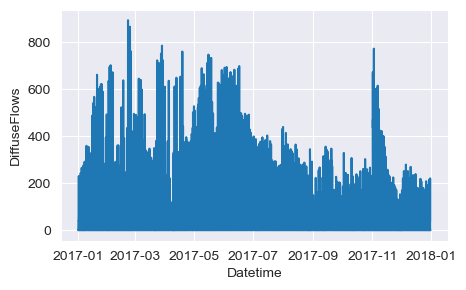

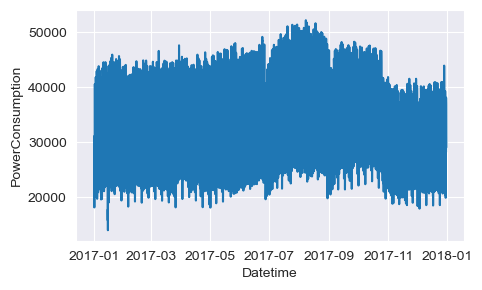

In [588]:
plot_line_for_columns(df,quantitative_attributes)

## Create lags

In [589]:
def shift(df:pd.DataFrame,columns:list[str],n:int) -> pd.DataFrame:
    df_copy = df.copy(deep=True)
    lags = range(n, 0, -1)
    for lag in lags:
        for column in columns:
            df_copy[f"{column}_{lag}"] = df_copy[column].shift(lag)
    return df_copy

In [590]:
list(df.columns)

['Temperature', 'Humidity', 'WindSpeed', 'DiffuseFlows', 'PowerConsumption']

In [591]:
df = shift(df,list(df.columns),5)

In [592]:
df

,Temperature,Humidity,WindSpeed,DiffuseFlows,PowerConsumption,Temperature_5,Humidity_5,WindSpeed_5,DiffuseFlows_5,PowerConsumption_5,...,Temperature_2,Humidity_2,WindSpeed_2,DiffuseFlows_2,PowerConsumption_2,Temperature_1,Humidity_1,WindSpeed_1,DiffuseFlows_1,PowerConsumption_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.101333,30999.493670,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.096333,27396.455697,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.428667,74.266667,0.082000,0.101333,30999.493670
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.110000,25407.594937,NaN,NaN,NaN,NaN,NaN,...,6.428667,74.266667,0.082000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.096333,27396.455697
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.115000,23906.835443,NaN,NaN,NaN,NaN,NaN,...,5.941000,75.866667,0.081667,0.096333,27396.455697,5.605000,77.900000,0.082000,0.110000,25407.594937
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.127333,22474.936707,NaN,NaN,NaN,NaN,NaN,...,5.605000,77.900000,0.082000,0.110000,25407.594937,5.492667,77.166667,0.082000,0.115000,23906.835443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.087667,34786.311787,9.710000,61.685000,0.075000,0.108667,37690.240813,...,9.150000,64.506667,0.086000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.109000,35930.038023
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.108667,34660.583017,9.196667,63.106667,0.074333,0.095333,37337.389100,...,8.110000,69.006667,0.081333,0.109000,35930.038023,7.913333,70.343333,0.081667,0.087667,34786.311787
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.107667,33326.235743,8.933333,63.473333,0.074667,0.120000,37171.102660,...,7.913333,70.343333,0.081667,0.087667,34786.311787,7.793333,69.563333,0.081000,0.108667,34660.583017


In [593]:
df.isnull().sum()

Temperature           0
Humidity              0
WindSpeed             0
DiffuseFlows          0
PowerConsumption      0
Temperature_5         5
Humidity_5            5
WindSpeed_5           5
DiffuseFlows_5        5
PowerConsumption_5    5
Temperature_4         4
Humidity_4            4
WindSpeed_4           4
DiffuseFlows_4        4
PowerConsumption_4    4
Temperature_3         3
Humidity_3            3
WindSpeed_3           3
DiffuseFlows_3        3
PowerConsumption_3    3
Temperature_2         2
Humidity_2            2
WindSpeed_2           2
DiffuseFlows_2        2
PowerConsumption_2    2
Temperature_1         1
Humidity_1            1
WindSpeed_1           1
DiffuseFlows_1        1
PowerConsumption_1    1
dtype: int64

In [594]:
df.dropna(axis=0,inplace=True)

In [595]:
df.isnull().sum()

Temperature           0
Humidity              0
WindSpeed             0
DiffuseFlows          0
PowerConsumption      0
Temperature_5         0
Humidity_5            0
WindSpeed_5           0
DiffuseFlows_5        0
PowerConsumption_5    0
Temperature_4         0
Humidity_4            0
WindSpeed_4           0
DiffuseFlows_4        0
PowerConsumption_4    0
Temperature_3         0
Humidity_3            0
WindSpeed_3           0
DiffuseFlows_3        0
PowerConsumption_3    0
Temperature_2         0
Humidity_2            0
WindSpeed_2           0
DiffuseFlows_2        0
PowerConsumption_2    0
Temperature_1         0
Humidity_1            0
WindSpeed_1           0
DiffuseFlows_1        0
PowerConsumption_1    0
dtype: int64

# Split the dataset into 80% training and 20% testing datasets

In [596]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'DiffuseFlows',
       'PowerConsumption', 'Temperature_5', 'Humidity_5', 'WindSpeed_5',
       'DiffuseFlows_5', 'PowerConsumption_5', 'Temperature_4', 'Humidity_4',
       'WindSpeed_4', 'DiffuseFlows_4', 'PowerConsumption_4', 'Temperature_3',
       'Humidity_3', 'WindSpeed_3', 'DiffuseFlows_3', 'PowerConsumption_3',
       'Temperature_2', 'Humidity_2', 'WindSpeed_2', 'DiffuseFlows_2',
       'PowerConsumption_2', 'Temperature_1', 'Humidity_1', 'WindSpeed_1',
       'DiffuseFlows_1', 'PowerConsumption_1'],
      dtype='object')

In [597]:
target = "PowerConsumption"

In [598]:
quantitative_attributes

['Temperature', 'Humidity', 'WindSpeed', 'DiffuseFlows', 'PowerConsumption']

In [599]:
from sklearn.model_selection import train_test_split
X, y = df.drop(columns=quantitative_attributes), df[target]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [600]:
X

,Temperature_5,Humidity_5,WindSpeed_5,DiffuseFlows_5,PowerConsumption_5,Temperature_4,Humidity_4,WindSpeed_4,DiffuseFlows_4,PowerConsumption_4,...,Temperature_2,Humidity_2,WindSpeed_2,DiffuseFlows_2,PowerConsumption_2,Temperature_1,Humidity_1,WindSpeed_1,DiffuseFlows_1,PowerConsumption_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:30:00,6.428667,74.266667,0.082000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.096333,27396.455697,...,5.492667,77.166667,0.082000,0.115000,23906.835443,5.000667,78.766667,0.082667,0.127333,22474.936707
2017-01-01 03:00:00,5.941000,75.866667,0.081667,0.096333,27396.455697,5.605000,77.900000,0.082000,0.110000,25407.594937,...,5.000667,78.766667,0.082667,0.127333,22474.936707,5.108000,79.100000,0.082000,0.131000,21691.139240
2017-01-01 03:30:00,5.605000,77.900000,0.082000,0.110000,25407.594937,5.492667,77.166667,0.082000,0.115000,23906.835443,...,5.108000,79.100000,0.082000,0.131000,21691.139240,5.097000,77.600000,0.082667,0.130000,20992.405063
2017-01-01 04:00:00,5.492667,77.166667,0.082000,0.115000,23906.835443,5.000667,78.766667,0.082667,0.127333,22474.936707,...,5.097000,77.600000,0.082667,0.130000,20992.405063,4.911667,76.566667,0.083000,0.152000,20629.873417
2017-01-01 04:30:00,5.000667,78.766667,0.082667,0.127333,22474.936707,5.108000,79.100000,0.082000,0.131000,21691.139240,...,4.911667,76.566667,0.083000,0.152000,20629.873417,4.952333,74.733333,0.083667,0.117333,20512.405063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,9.710000,61.685000,0.075000,0.108667,37690.240813,9.196667,63.106667,0.074333,0.095333,37337.389100,...,9.150000,64.506667,0.086000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.109000,35930.038023
2017-12-30 22:00:00,9.196667,63.106667,0.074333,0.095333,37337.389100,8.933333,63.473333,0.074667,0.120000,37171.102660,...,8.110000,69.006667,0.081333,0.109000,35930.038023,7.913333,70.343333,0.081667,0.087667,34786.311787
2017-12-30 22:30:00,8.933333,63.473333,0.074667,0.120000,37171.102660,9.150000,64.506667,0.086000,0.090000,36846.641317,...,7.913333,70.343333,0.081667,0.087667,34786.311787,7.793333,69.563333,0.081000,0.108667,34660.583017


In [601]:
y

Datetime
2017-01-01 02:30:00    21691.139240
2017-01-01 03:00:00    20992.405063
2017-01-01 03:30:00    20629.873417
2017-01-01 04:00:00    20512.405063
2017-01-01 04:30:00    20439.493670
                           ...     
2017-12-30 21:30:00    34786.311787
2017-12-30 22:00:00    34660.583017
2017-12-30 22:30:00    33326.235743
2017-12-30 23:00:00    31249.683140
2017-12-30 23:30:00    28966.286437
Freq: 30T, Name: PowerConsumption, Length: 17467, dtype: float64

## Create the model, pre-process the data and make it suitable for training

In [602]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [603]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [604]:
# (train_X.shape[0], 5, 5)

In [605]:
train_X.shape[1]

25

In [606]:

new_train_shape = (train_X.shape[0], 5, 5)
new_train_shape

(13973, 5, 5)

In [607]:

new_test_shape = (test_X.shape[0], 5, 5)
new_test_shape

(3494, 5, 5)

In [608]:
train_X = train_X.reshape(new_train_shape)
test_X = test_X.reshape(new_test_shape)

In [609]:
from keras.layers import LSTM, Dense
from keras import Sequential, Input

model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [610]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 64)             17920     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [611]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [612]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=16, batch_size=64, shuffle=False)

Epoch 1/16
175/175 [==============================] - 1s 3ms/step - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 2/16
175/175 [==============================] - 0s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 3/16
175/175 [==============================] - 0s 2ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 4/16
175/175 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 5/16
175/175 [==============================] - 0s 2ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/16
175/175 [==============================] - 0s 3ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7/16
175/175 [========

<Axes: >

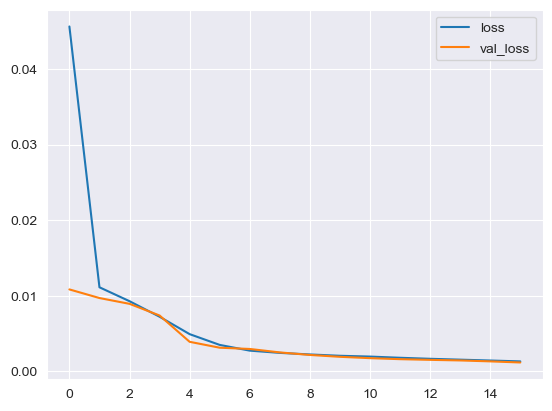

In [613]:

sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

## Train the model, use 20% of the training dataset for validation
Train with 10 epochs (due to time limit)

## Plot the loss function on the training and validation dataset

## Calculate the adequate metrics

In [614]:
pred_y = model.predict(test_X)


110/110 [==============================] - 0s 550us/step


In [615]:
pred_y = scaler.inverse_transform(pred_y)


In [617]:
from sklearn.metrics import r2_score

r2_score(test_y, pred_y)


0.9452396153388152

In [618]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(1096.3170583181286, 2072839.097527886, 0.9452396153388152)

## Visualize the targets against the predictions

<Axes: xlabel='Datetime'>

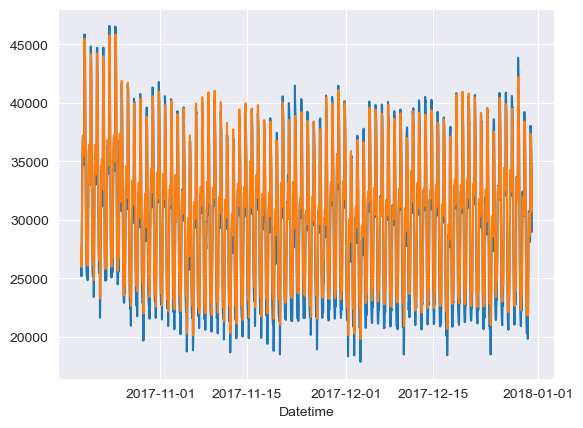

In [619]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y.flatten())